In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_utils import *
import cifar10_DNN

Using TensorFlow backend.


cifar10_DNN모듈을 사용한다

원래 이미지 데이터

In [2]:
(X_train_origin, Y_train_origin), (X_test_origin, Y_test_origin) = cifar10_DNN.datasets.cifar10.load_data()

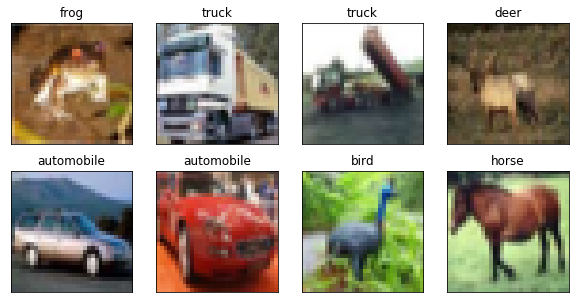

In [3]:
show_images(X_train_origin, Y_train_origin, 8)

pre-processing된 데이터 load

In [4]:
(X_train, Y_train), (X_test, Y_test) = cifar_DNN_data_load(cifar10_DNN.datasets.cifar10)

Data type changed to float32, label type changed to categorical
Normalize Data


In [5]:
cifar_model = cifar10_DNN.CifarDNN(img_shape = X_train.shape[1], class_num = Y_train.shape[1])

모델 펼처보기

In [6]:
cifar_model.show_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer1 (Dense)         (None, 32)                98336     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 64)                2112      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
__________

In [7]:
history_train = cifar_model.train(X_train, Y_train, 2, 32, 0.2)

#  model evaluate
result = cifar_model.show_eval(X_test, Y_test, 32)
print('Test Loss : ', result[0])
print('Test Accuracy : ', result[1]*100, '%')

print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))
print('actual class : ', np.where(Y_test[:3])[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 6s 141us/step - loss: 1.9935 - acc: 0.2916 - val_loss: 1.7507 - val_acc: 0.3874

Epoch 00001: val_loss improved from inf to 1.75066, saving model to ./save_model/model/2019-05-02_20h49m04s/01-1.7507-0.2916.hd5
Epoch 2/2
40000/40000 [==============================] - 5s 129us/step - loss: 1.7845 - acc: 0.3637 - val_loss: 1.6859 - val_acc: 0.4041

Epoch 00002: val_loss improved from 1.75066 to 1.68587, saving model to ./save_model/model/2019-05-02_20h49m04s/02-1.6859-0.3638.hd5

 Training time : 11.479687929153442 sec

10000/10000 [==============================] - 0s 45us/step
Test Loss :  1.6584696405410766
Test Accuracy :  0.4129
Test Loss :  1.6584696405410766
Test Accuracy :  41.29 %
predict class :  [3 1 8]
actual class :  [3 8 8]


In [8]:
print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))

predict class :  [3 1 8]


In [9]:
print('predict class : ',cifar_model.predict(X_test[:3]))

predict class :  [3 1 8]


In [10]:
prediction = cifar_model.predict(X_test)

In [11]:
print(Y_test_origin[:8])
print(prediction[:8])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]]
[3 1 8 8 4 6 3 4]


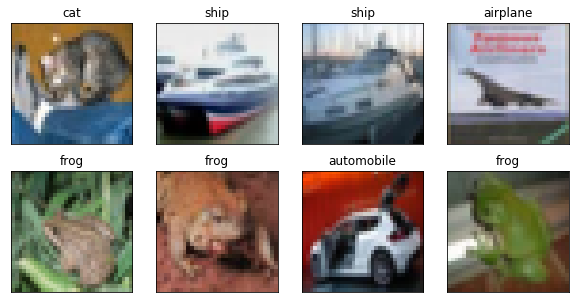

In [12]:
show_images(X_test_origin, Y_test_origin, 8)

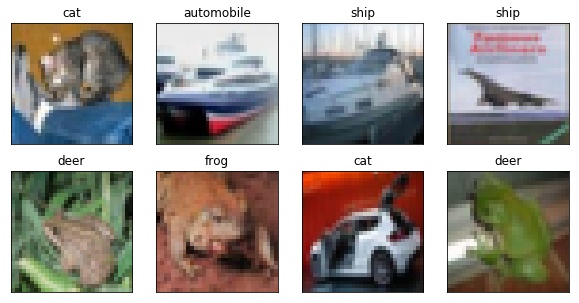

In [13]:
show_images(X_test_origin, prediction, 8)

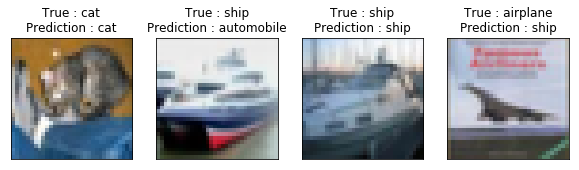

In [14]:
show_images_compare(X_test_origin, Y_test_origin, prediction)

In [15]:
result = cifar_model.show_eval(X_test, Y_test, 32)

10000/10000 [==============================] - 0s 31us/step
Test Loss :  1.6584696405410766
Test Accuracy :  0.4129


In [16]:
print('predict class : ',cifar_model.model.predict(X_test[:3]))

predict class :  [[1.1785318e-01 8.2726493e-02 9.3093917e-02 1.3298278e-01 7.9004996e-02
  1.2865575e-01 1.0744580e-01 5.5033397e-02 1.2582703e-01 7.7376723e-02]
 [6.6901900e-02 3.4657437e-01 2.6541662e-03 2.8178217e-03 5.8841467e-04
  1.2932573e-03 4.9081899e-04 6.2201772e-04 2.8633761e-01 2.9171959e-01]
 [1.4636254e-01 1.1581966e-01 1.0115713e-02 4.4693588e-03 1.7090839e-03
  3.7821599e-03 3.1623631e-04 4.4331192e-03 5.9211874e-01 1.2087331e-01]]


In [17]:
print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))

predict class :  [3 1 8]


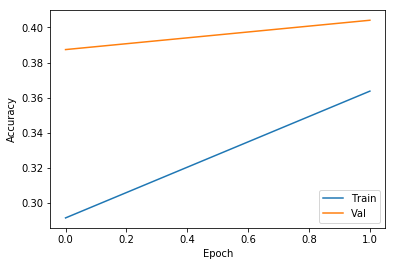

In [18]:
cifar10_DNN.plot_acc(history_train)

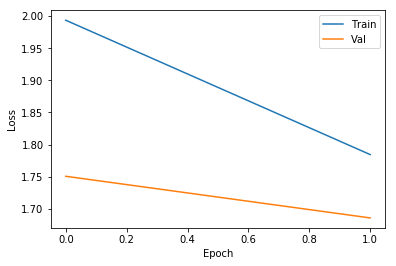

In [19]:
cifar10_DNN.plot_loss(history_train)

In [20]:
history_train.history['acc'][-1]

0.36375

In [21]:
prediction = cifar_model.model.predict(X_test)
Y_prediction = np.argmax(prediction, axis=1)

# label shape is digit
print(confusion_mat(Y_test_origin, Y_prediction))

[[496  65  13  27  47  15  28  52 210  47]
 [ 35 644   3  21  20  24  47  23  93  90]
 [114  43  89  54 294  70 187  83  45  21]
 [ 41  59  36 195  83 196 244  66  38  42]
 [ 61  26  29  28 460  42 197 108  29  20]
 [ 35  29  36 145 124 320 170  71  45  25]
 [  8  33  17  46 221  44 577  20  15  19]
 [ 61  42  20  44 140  63  87 442  35  66]
 [143 142   3  18  12  25  21  17 570  49]
 [ 45 338   8  24  15  15  59  43 117 336]]


In [22]:
print(confusion_report(Y_test_origin, Y_prediction))

              precision    recall  f1-score   support

           0       0.48      0.50      0.49      1000
           1       0.45      0.64      0.53      1000
           2       0.35      0.09      0.14      1000
           3       0.32      0.20      0.24      1000
           4       0.32      0.46      0.38      1000
           5       0.39      0.32      0.35      1000
           6       0.36      0.58      0.44      1000
           7       0.48      0.44      0.46      1000
           8       0.48      0.57      0.52      1000
           9       0.47      0.34      0.39      1000

   micro avg       0.41      0.41      0.41     10000
   macro avg       0.41      0.41      0.39     10000
weighted avg       0.41      0.41      0.39     10000



In [23]:
np.unique(Y_test_origin)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])